<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Fin_FrieU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-i8llpo2z
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-i8llpo2z
  Resolved https://github.com/pydata/xarray.git to commit c25215299c02cd36781cf3aa38e8583d1fe14849
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev1+gc2521529-py3-none-any.whl size=1247984 sha256=434f3f1a573c98ec2eb72a58cc7f132a4cf17733a5351dd41b8bf8af74dc6d92
  Stored in directory: /tmp/pip-ephem-wheel-cache-q8a9hc6k/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━━

In [2]:
life_data = pd.read_csv('https://raw.githubusercontent.com/finfrierson/data-science-fundamentals/refs/heads/main/Life-Expectancy-Data-Averaged.csv')

In [ ]:
print(life_data['Economy_status'][1])

1.0


In [ ]:
count=0
for item in life_data['Economy_status']:
    if item ==1:
      life_data['Economy_status'][count] = "Developed"
    else:
      life_data['Economy_status'][count] = "Developing"
    count+=1

<ipython-input-20-c768d7583231>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  life_data['Economy_status'][count] = "Developing"
<ipython-input-20-c768d7583231>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

I was struggling with economy status becoming a range of values from 0 to 1 rather than being categorical, so i altered it to be a string. This ended up fixing my problems of running my model.

In [ ]:
life_data

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,Developing,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,Developed,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,Developed,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,Developed,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,Developed,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,Developed,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,Developed,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,Developed,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,Developed,52.33125


My data set has various data on each country on economic factors, prevelance of immunization to diseases, various health statistics (ex. life expectancy), and more. I wil be looking at percentage immunization of a couple diseases along with GDP and years of schooling, and find what combination of predictors would be most effective at predicting the rate of infant mortality.




#Choosing a model

The variables I will be using and what they mean (Descriptions taken from the kaggle dataset I used, created by Shreyas):

Infant deaths - Number of infant deaths per 1000 live births

%Polio - Percentage of immunization coverage for polio.

%Diptheria - Percentage of immunization coverage for diphtheria.

GDP - Gross Domestic Product per capita in USD.

Economy status - Economic classification of the country (developing or developed).

Schooling - Average years of schooling.

I will mainly use Polio and Diphtheria, as based on my research those tend to have the highest mortality rates among children. Measles is very low death rate for children and Hepatitus B is more of a long term disease. Diphtheria is, by a good margin, the most immediately fatal of these. The other predictors I will test most are Economy Status and GDP, as they seem to be a good predictor of if a country can afford widespread immunization, and thus helps predicts immunization %s. Because Economy status is categorical, I will try it both as a regular predictor and in a hierarchical model. Lastly, I will be testing average years of education in two models.

In [ ]:
model_1 = bmb.Model("`Infant_deaths` ~ GDP_per_capita + (Diphtheria|Economy_status)", data=life_data)
idata_1_h = model_1.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 107 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:01:57

ERROR:pymc.stats.convergence:There were 583 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
model_2 = bmb.Model("`Infant_deaths` ~ GDP_per_capita + (Polio|Economy_status)", data=life_data)
idata_2_h = model_2.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 63 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:02:42

ERROR:pymc.stats.convergence:There were 135 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
model_3 = bmb.Model("`Infant_deaths` ~ GDP_per_capita + `Polio` + Economy_status + `Polio`:Economy_status + GDP_per_capita:Economy_status", data=life_data)
idata_3_b = model_3.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:43

In [ ]:
model_4 = bmb.Model("`Infant_deaths` ~ GDP_per_capita + `Diphtheria` + Economy_status + `Diphtheria`:Economy_status + GDP_per_capita:Economy_status", data=life_data)
idata_4_b = model_4.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:44

In [ ]:
model_5 = bmb.Model("`Infant_deaths` ~ Schooling + `Polio` + Economy_status + `Polio`:Economy_status", data=life_data)
idata_5_b = model_4.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:41

In [ ]:
model_6 = bmb.Model("`Infant_deaths` ~ Schooling + `Diphtheria` + Economy_status + `Diphtheria`:Economy_status", data=life_data)
idata_6_b = model_4.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
compare = az.compare({"hierachical 1":idata_1_h,"hierarchical 2":idata_2_h,"predictor 3":idata_3_b, "predictor 4":idata_4_b,"predictor 5":idata_5_b, "predictor 6":idata_6_b })

In [ ]:
compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
predictor 3,0,-731.984784,5.615344,0.000000,9.615438e-01,13.111890,0.000000,False,log
hierarchical 2,1,-736.034244,3.953667,4.049460,3.845617e-02,13.043571,2.569414,False,log
predictor 4,2,-739.925237,5.337297,7.940453,0.000000e+00,13.253076,3.454269,False,log
hierachical 1,3,-745.090076,4.401580,13.105292,0.000000e+00,13.361321,4.147238,False,log
predictor 5,4,-745.684933,4.912314,13.700148,0.000000e+00,12.995673,4.104472,False,log
predictor 6,5,-746.017099,5.167148,14.032315,5.551115e-15,13.079887,4.127787,False,log


In [ ]:
az.plot_compare(compare)

Based on my assumptions alongside elpd_loo scores, any of these models could be viable, but a model based on polio rather than diptheria would be best, and specifically predictor 3, which uses GDP per capita, Polio immunization %, and economy status, with a relationship as Polio immunization and economy status alonf with a relationship between GDP and economy status.

#Model running

In [3]:
model_nb = bmb.Model("`Infant_deaths` ~ GDP_per_capita + `Polio` + Economy_status + `Polio`:Economy_status + GDP_per_capita:Economy_status", data=life_data)
idata_nb = model_nb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Yikes. I'm not entirely sure how to fix this problem. I'll use the model I originally intended without the negative binomial, and just ignore the negative values, and take more info from the slope, and initial trends.

In [ ]:
model_2 = bmb.Model("`Infant_deaths` ~ GDP_per_capita + `Polio` + Economy_status + `Polio`:Economy_status + GDP_per_capita:Economy_status", data=life_data)
idata_2 = model_3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 2 Axes>,
 array([<Axes: title={'center': 'Economy_status = Developed'}, xlabel='Polio', ylabel='Infant_deaths'>,
        <Axes: title={'center': 'Economy_status = Developing'}, xlabel='Polio', ylabel='Infant_deaths'>],
       dtype=object))

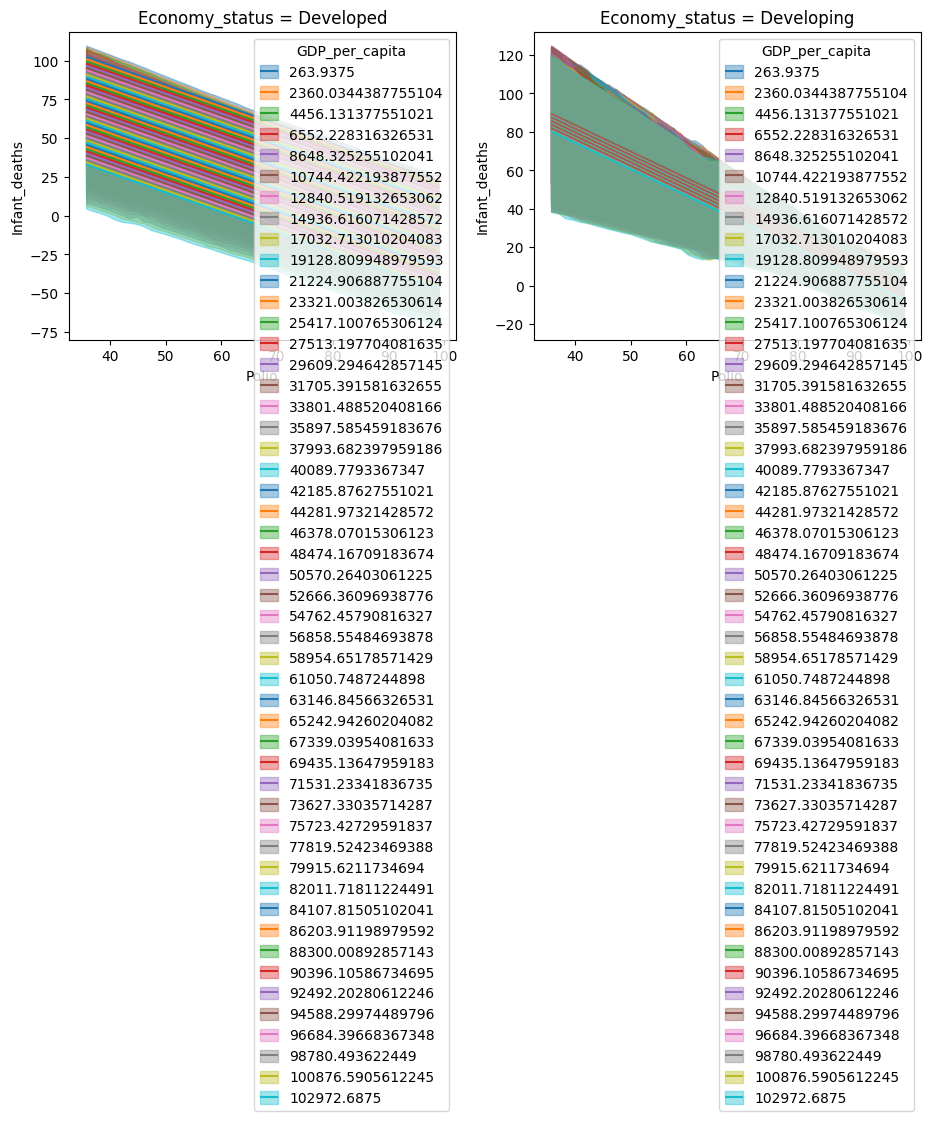

In [ ]:
bmb.interpret.plot_predictions(model_2,
                               idata_2,
                               ["Polio","GDP_per_capita","Economy_status"],
                               fig_kwargs={"figsize":(11, 4)})

This is a bit of a wacky model! Because I used 3 predictors the model was split between the categorical (Developed vs Developing) and had infant mortality and Polio immunization on the axes with GDP per capita as each of the lines. I think this can get some of the underlining trends, but Ill try plotting some models with just two of the predictors. What we can tell, however, is that the model is confident in both developed and developing countries that there is a strong negative correlation between infant deaths and polio, with lower gdp countries on average having the highest infant mortality.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Polio', ylabel='Infant_deaths'>], dtype=object))

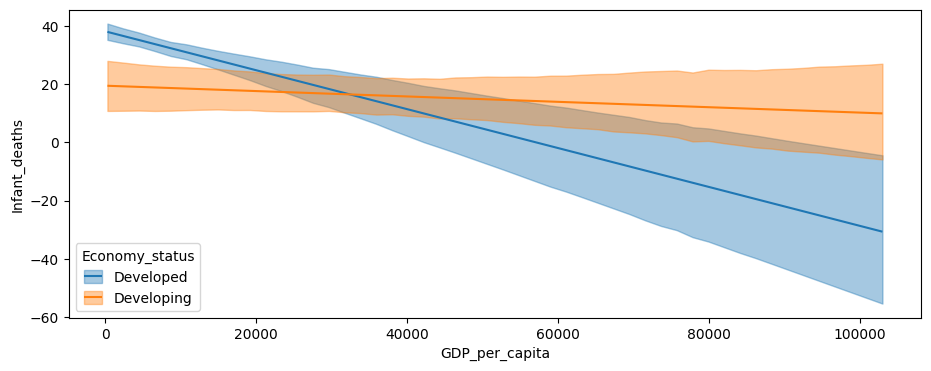

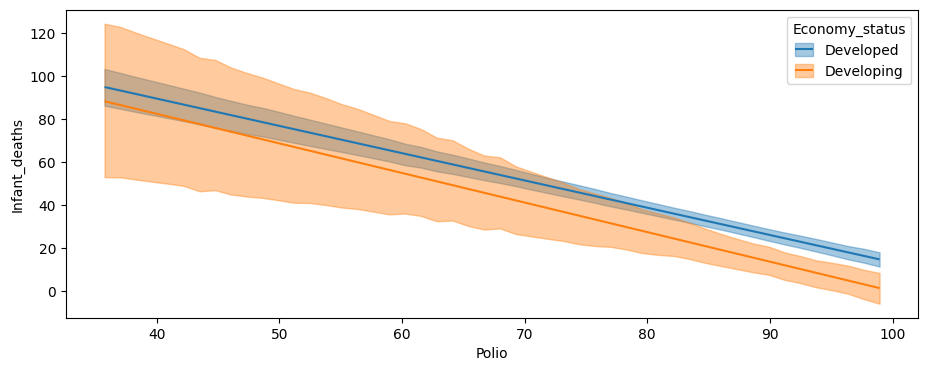

In [ ]:
bmb.interpret.plot_predictions(model_3,
                               idata_3_b,
                               ["GDP_per_capita","Economy_status"],
                               fig_kwargs={"figsize":(11, 4)})
bmb.interpret.plot_predictions(model_3,
                               idata_3_b,
                               ["Polio","Economy_status"],
                               fig_kwargs={"figsize":(11, 4)})

This is another model showing similar trends to before. The only thing that had me confused is in the graph between infant mortality and Polio immunization percentage. On averagre, the developed countries tended to have greater amounts of infant deaths. While this trend is most likely innacurate, I believe the slopes here are likely due to the sections of data being skewed. By this I mean a lot of the data points for developed countries tend to have a larger immunization percentage, while developing countries tend to have as smaller immunization percentage. This could lead to predictions that are innacurate.

**Conclusion**


Overall, from my model I was able to find that As immunization percentages and GDP get higher, the rate of infant mortality drastically decreases (From as much as 10% to virtually none). This was essentially what I thought was going to happen, but it is nice to see my model backing up these ideas.